Executing cells is not the same as learning.  Now is the time for you
to truly learn by writing some code on your own.  You can add your own
cells to this worksheet, save your work, and then commit your
solutions to a fork of our class repo.

****Warning:**** Depending on your background, you may feel you are
unprepared for this task.  **Make as much progress as you can.** The
good news is that with Google, StackOverflow, etc., you are more
powerful than you know.  Leverage the resources at your disposal to
make the most of our short time together.



## Exercise 1.1



For a list `L`, what is the meaning of `L[-1]`, `L[-2]`, `L[1:3]`,
`L[:]`, `L[-3:-1]`, `L[-2:]`, `L[::-1]`?  Explore this by building
some lists and executing cells right here in this Jupyter notebook.
(If you get stuck, search for **slicing**.)



## Exercise 1.2



Define a function `digits()` which takes a positive integer and
returns the number of digits in its decimal expansion.  For instance,
`digits(321)` evaluates to `3`.

How many digits are in the decimal expansion of `2**1000`?



In [10]:
import math

def digits(num):
    
    #This computes the number of digits in a very mathematical way using log_10 and taking the floor of the result
    
    return math.floor(math.log10(num)) + 1


## Exercise 1.3



Define `harmonic` so that `harmonic(n)` is the sum of the first `n`
terms of the harmonic series, i.e., `harmonic(4)` equals $1 + \frac{1}{2} + \frac{1}{3} + \frac{1}{4}$.



In [11]:
def harmonic(n):
    
    #This variable will store the numbers we add
    series = 0
    
    #This for loop will add the fractions together
    for k in range(1, n+1):   
        series = series + (1/k)
        
    return series
     

## Exercise 1.4



Define a function `uniqued` which takes a list and removes all
repeated entries.  For instance, `uniqued([1,5,1,4])` equals `[1,5,4]`.



## Exercise 1.5



Explain what is happening in the code below (e.g., what does this say about **associativity** of `+`?)



In [1]:
eps = 1.0
while 1.0 + eps != 1.0:
    eps = eps / 2.0
print(1.0 + (eps - eps))
print((1.0 + eps) - eps)

If you (don&rsquo;t?) like this, you might enjoy reading \*[What Every
Computer Scientist Should Know About Floating-Point
Arithmetic]([https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html))\*.



## Exercise 1.6



Write a function `is_palindrome` which takes a string and returns
`True` if it is a palindrome, and `False` if not.  Find an English
word list (such as [https://github.com/dwyl/english-words>](https://github.com/dwyl/english-words>)which
includes some Python examples) to find English palindromes.

There are many entertaining games to play with word lists.  Find more
examples of words like **almost** and **wronged** whose letters are in
alphabetical or reverse-alphabetic order.  Is the spelling &ldquo;rule&rdquo; **i
before e except after c** valid?  Can you make a histogram showing
frequency of letters in English words?  How might you visualize
frequency of pairs of letters?



## Exercise 1.7



Define a function `flip` which takes an integer and reverses its
digits, so that `flip(17)` evaluates to `71`.  By repeatedly replacing
`x` with `x + flip(x)`, we often find palindromic numbers this way,
e.g., 192 + 291 is 483, and 483 + 384 is 867, and and 867 + 768 is
1635, and 1635 + 5361 is 6996, a palindrome!  Experimentally, does
this always happen?  For fun, use `matplotlib` to make some graphs.

This exercise is designed for you to worry about types, e.g., `'17' +
'71'` equals `'1771'` because strings are concatenated with plus.



In [64]:
import matplotlib.pyplot as plt

#This function will be the flip function that takes numbers to their flips, i.e. 17 -> 71
def flip(n):
    
    strn = str(n)

    return int(strn[::-1])

#This function determines if a number is a palindromic number. It outputs boolean values
def ispalindrome(n):
    return n == flip(n)

#This function produces 3 pieces of data: [number, palindromic number, number of steps]
#Essentially, we take a number n and perform the palindromic iteration process until we hit a palindromic number
#We also take one more input k that will serve as a terminating point in the iterating process if we fail to hit a
#palindromic number
def palindromegenerator(n, k):
    
    #lst represents the data we are looking for, i counts the number of iterations of the palindromic search process
    #and pnum is the number that will eventually turn into a palindromic number
    i = 0
    pnum = n
    
    #This while loop checks to make sure we have not iterated the process too far and that pnum is not a palindromic
    #number. Otherwise, once we go far enough or find a palindromic number we spit out our answer
    _ispalindrome = ispalindrome(pnum)
    while (i < k) and (not _ispalindrome):
        pnum = pnum + flip(pnum)
        i = i + 1
        _ispalindrome = ispalindrome(pnum)
    
    return _ispalindrome, pnum, i

#This is a recursive version of the function above
def alt_palindromegenerator(n,k,num_iter=0):
    _ispalindrome = ispalindrome(n)
    if _ispalindrome or k == 0:
        return _ispalindrome,n,num_iter
    else:
        return alt_palindromegenerator(n+flip(n),k-1,num_iter+1)
    
#This function outputs a plot that looks numbers up to x versus the number of iterations of the palindromic process
#to eventually hit a palindromic number. AGAIN recall that this will only go up to some specified k in case a number
#never becomes palindromic
def plotpalindromic(x, k):
    
    #These lists are the lists we will be cross-plotting
    #numlst = []
    #iterationlst = []
    
    #This "for" loop computes palindromegenerator(n, k) to get the data for the number of iterations and then adds it to
    #iterationlst
    #for n in range(1, x + 1):
    
        #numlst.append(n)
        #iterationlst.append(palindromegenerator(n, k)[2])
     
    #This final bit adds generates the plot we want
    plt.plot(range(1,x+1), [palindromegenerator(n,k)[2] for n in range(1,x+1)])
    plt.xlabel('numbers')
    plt.ylabel('number of iterations')
    plt.show()
    
def alt_plotpalindromic(x, k):
    
    #These lists are the lists we will be cross-plotting
    numlst = []
    iterationlst = []
    
    #This "for" loop computes palindromegenerator(n, k) to get the data for the number of iterations and then adds it to
    #iterationlst
    for n in range(1, x + 1):
    
        numlst.append(n)
        iterationlst.append(palindromegenerator(n, k)[2])
     
    #This final bit adds generates the plot we want
    plt.plot(numlst, iterationlst)
    plt.xlabel('natural numbers')
    plt.ylabel('number of iterations')
    plt.show()
    
class Palindrome_Generator:
    def __init__(self,n,k):
        self.n = n
        self.k = k
    def calculate(self):
        self._ispalindrome, self.pnum, self.i = palindromegenerator(self.n,self.k)
    
    
#We call numbers that are not palindromic LYCHREL NUMBERS. So it would be great to have a function that 
#creates a list of potential Lychrel numbers up to a number x. Again, we will only compute up to a certain iteration number. So the
#list will depend on that threshold.
def lychrelnumberlst(x, k):
    
    lst = []
    
    for n in range(1, x + 1):
        if not palindromegenerator(n, k)[0]:
            lst.append(n)
    
    return lst

#Notice that if we take a potential lychrel number, say 196, every iteration of the palindromic process will create
#another lychrel number. We call the initial numbers of such chains the ROOT lychrel number. So it would be great to
#have a function that will generate a list of root lychrel numbers.
def rootlychrelnumberlst(x, k):
    
    rootlst = []
    lst = lychrelnumberlst(x, k)
    
    #The idea behind this algorithm is to add the smallest element of the list of lychrel numbers (which is a root
    #lychrel number) to a list of all the roots. Then remove all the numbers that are just iterations of that root from
    #the list of all lychrel numbers. We iterate this process until the list of all lychrel numbers up to x is
    #exhausted.
    while len(lst) > 0:
        
        #We set mlychrel to be the smallest lychrel number we have and add it to our root list
        mlychrel = min(lst)
        rootlst.append(mlychrel)
        
        #This "while" loop removes all the iterations of our root lychrel number from the list of all lychrel numbers
        while mlychrel <= max(lst):
            
            if mlychrel in lst:
                lst.remove(mlychrel)
            
            mlychrel = mlychrel + flip(mlychrel)
            
            #This "if" line addresses an edge case where the last element of a list is removed inside the "while" loop.
            #If this happens, then max(lst) will return an error while checking the conditions of the "while" loop.
            #So we break before this happens.
            if len(lst) == 0:
                break
            
    return rootlst

#This function computes the natural density of the lychrel numbers. Again, the density depends on how far we search
#and how many times we iterate.
def densityoflychrel(x, k):
    
    return len(lychrelnumberlst(x, k))/x
   

In [18]:
densityoflychrel(1000000, 500)

0.115752

In [13]:
rootlychrelnumberlst(1000, 500)

[196, 295, 394, 493, 592, 689, 691, 788, 790, 879, 978, 986]

In [9]:
5 in [1,2,3,4]

False

In [2]:
alt_palindromegenerator(12,10)

(True, 33, 1)

In [5]:
alt_palindromegenerator(188,500)

(False,
 1069,
 (False,
  10670,
  (False,
   18271,
   (False, 35552, (False, 61105, (False, 111221, (True, 233332, 7)))))))

In [6]:
alt_palindromegenerator(188,500)

(False,
 1069,
 (False,
  10670,
  (False,
   18271,
   (False, 35552, (False, 61105, (False, 111221, (True, 233332, 7)))))))

In [12]:
alt_palindromegenerator(188,500)

(True, 233332, 6)

In [11]:
alt_palindromegenerator(196,500)

(False,
 1752847268748579360856038715960044425725757992013037000002688443068871978931327317473003204842296809284684808907596472017593238402409285712633138880168870244986299999740201399757418514440178428829658064964857772648267,
 500)

In [13]:
alt_palindromegenerator(88,500)

(True, 44044, 5)

In [17]:
alt_palindromegenerator(88,500)

(True, 88, 0)

In [18]:
alt_palindromegenerator(188,500)

(True, 233332, 7)

In [19]:
alt_palindromegenerator(196,500
                       )

(False,
 931423633824289735373068912980022207417878996006463505496394221534435934470613658741952102416192959097792354454298681058301624201150137856317064440634435122492605494375600699878703812220089208969284526982429436324128,
 500)

In [20]:
alt_palindromegenerator(12,500)

(True, 33, 1)

In [30]:
palindromegenerator(188,500)

(True, 233332, 7)

In [31]:
palindromegenerator(12,500)

(True, 33, 1)

In [32]:
palindromegenerator(196,500)

(False,
 931423633824289735373068912980022207417878996006463505496394221534435934470613658741952102416192959097792354454298681058301624201150137856317064440634435122492605494375600699878703812220089208969284526982429436324128,
 500)

In [33]:
palindromegenerator(11,500)

(True, 11, 0)

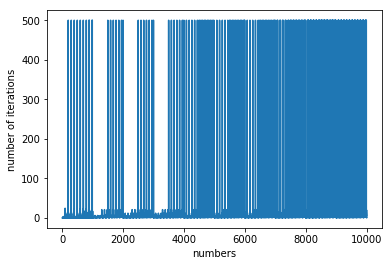

In [37]:
plotpalindromic(10000, 500)

In [38]:
fliter

NameError: name 'fliter' is not defined

In [39]:
filter

filter

In [42]:
list(filter(lambda n: not palindromegenerator(n,500)[0], range(1,1001)))

[196, 295, 394, 493, 592, 689, 691, 788, 790, 879, 887, 978, 986]

In [43]:
filter(lambda n: palindromegenerator(n,500)[0], range(1,1001))

In [46]:
my_palindromes = list(filter(lambda n: palindromegenerator(n,500)[0], range(1,1001)))

In [47]:
len(my_palindromes)

987

In [48]:
my_iters = list(map(lambda n: alt_palindromegenerator(n,500)[2], my_palindromes))

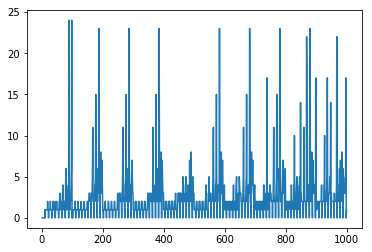

In [50]:
plt.plot(my_palindromes, my_iters)

In [56]:
len(list(filter(lambda n: 75<= palindromegenerator(n,200)[2] < 200, range(1,100001))))

0

In [59]:
l = list(filter(lambda n: 50<= palindromegenerator(n,200)[2] < 200, range(1,100001)))

In [60]:
l

[10677,
 10833,
 10911,
 11667,
 11823,
 11901,
 12657,
 12813,
 13647,
 13803,
 14637,
 15627,
 16617,
 17607,
 20676,
 20832,
 20910,
 21666,
 21822,
 21900,
 22656,
 22812,
 23646,
 23802,
 24636,
 25626,
 26616,
 27606,
 30675,
 30831,
 31665,
 31821,
 32655,
 32811,
 33645,
 33801,
 34635,
 35625,
 36615,
 37605,
 40674,
 40830,
 41664,
 41820,
 42654,
 42810,
 43644,
 43800,
 44634,
 45624,
 46614,
 47604,
 50673,
 51663,
 52653,
 53643,
 54633,
 55623,
 56613,
 57603,
 60672,
 61662,
 62652,
 63642,
 64632,
 65622,
 66612,
 67602,
 70269,
 70671,
 71259,
 71661,
 72249,
 72651,
 73239,
 73641,
 74229,
 74631,
 75219,
 75621,
 76209,
 76299,
 76611,
 77289,
 77601,
 78279,
 79269,
 80268,
 80670,
 81258,
 81660,
 82248,
 82650,
 83640,
 84228,
 84630,
 85218,
 85620,
 86208,
 86298,
 86610,
 87288,
 87600,
 88278,
 89268,
 90267,
 91257,
 92247,
 93237,
 94227,
 95217,
 96207,
 96297,
 97287,
 98277,
 99267]

In [61]:
max(palindromegenerator(n,200)[2] for n in l)

55

In [65]:
pg = Palindrome_Generator(196,500)

In [66]:
pg.n

196

In [67]:
pg.k

500

In [68]:
pg.calculate()

In [69]:
pg.i

500

In [70]:
pg._ispalindrome

False

In [71]:
pg.pnum

931423633824289735373068912980022207417878996006463505496394221534435934470613658741952102416192959097792354454298681058301624201150137856317064440634435122492605494375600699878703812220089208969284526982429436324128

In [79]:
%timeit -n5 [alt_palindromegenerator(n,500) for n in range(1,10000)]

702 ms ± 76.5 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [78]:
%timeit -n5 [palindromegenerator(n,500) for n in range(1,10000)]

612 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
